In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

%matplotlib inline

In [24]:
df = pd.read_csv('dec19_400k_rs1_edt_fillna_2.csv')

In [25]:
T0 = df[df['Severity'] < 3].Temperature_filled_mean

In [26]:
T1 = df[df['Severity'] >= 3].Temperature_filled_mean

In [27]:
print("Severity_less_than_3 count:",T0.count()," | ", "Severity_3_and_above count:",T1.count())


Severity_less_than_3 count: 268324  |  Severity_3_and_above count: 131676


### Hypothesis testing
Three features were picked for hypothesis testing. <br>
**Null Hypothesis:** Preciptation / Temperature /Humidity have no impact on severity of road accidents.<br>
**Alternate hypothesis:** Precipitation / Temperature /humidity have an observable effect on severity of road accidents.<br>

#### Split data into two samples: 
Low severity: Severity 1 & 2, [P0 / T0 / H0] (count: 268324) and <br>
High severity : Severity 3 & 4 [P1 / T1 /H1] (count: 131676)

#### Results:
**Precipitation**: <br>
Difference in mean of P0 and P1 = -0.00217 <br>
Reject the null hypothesis since p-value is zero. Precipitation has an impact on road accident severity. <br>
Lower severities are associated with lower mean precipitation, and higher precipitation is associated with more severe road accidents.<br>

**Temperature**: <br>
Number of samples T0 / T1: 268324 / 131676.
Reject the null hypothesis since p-value is zero. Temperature does have an effect on accident severity. since T0 - T1 is positive(0.863), this implies the mean temperatures of severities 1 and 2 are *higer* than mean temperatures of severities 3 and 4. There seems to be a relationship between *lower* temperatures and more severe accidents.<br>

**Humidity**:<br>
Reject the null hypothesis.<br>
*Higher* humidity is associated with more severe accidents. The mean difference in humidity between the two groups is about 0.9%.

### Observations:
Difference in the mean between the low severity and high severity groups is very small: 0.002inches for Precipitation, less than a degree F for Temperature, and less than 1% for Humidity.

#### Sample datasize trials:
A.1)  A sample of 1563, for the city of Columbus, was taken from the dataset, and the hypothesis tests re-run for 'Precipitation'. A p-value of 0.66 was obtained.<br>

A.2)  A sample of 1651, for the city of Ta, Tampa taken from the dataset, and the hypothesis tests re-run for 'Precipitation'. A p-value of 0.287 was obtained.<br>

B) Samples of different sizes were taken from the dataset. The table below summarizes the size and p-values for the 'Precipitation' hypotheses tests.

| Number of Samples | 50 | 100| 4000| 20000|40000|80000|150000| 220000| 240000| 4.0e+05 |
|------------------|-----|-----|-----|-----|-----|-----|------|-------|-------|----------|
| p-values          | 0.798|0.267| 0.005|0.087|0.18|0.069|0.002| 0.0003|0.000016| 3.80e-07 |

<br>

__From the table, we can see a general trend of decreasing p-values as number of random samples increases, within the same dataset.__According to the figure below, 50000 seems to be the sample size beyond which there is a steady and stable decrease in p-values.

Stratified sampling of two cities, Columbus and Tampa, shows high p-values at small sample sizes as well.

In [28]:
df_severity_under3 = df[df['Severity'] < 3]

In [29]:
df_severity_over3 = df[df['Severity'] >= 3]

In [30]:
P1 = df_severity_over3.Precipitation_filled
P0 = df_severity_under3.Precipitation_filled

In [31]:
T1 = df_severity_over3.Temperature_filled_mean
T0 = df_severity_under3.Temperature_filled_mean

In [32]:
H1 = df_severity_over3.Humidity_filled_mean
H0 = df_severity_under3.Humidity_filled_mean

##### calc_n_mean_std Function
is used to centralize the calculation of mean, std and count for a series. These variables are used at different parts of the analysis in the form x[0] to extract the number of rows, x[1] the mean and x[2] the standard deviation of the 1D series.

In [33]:
def calc_n_mean_std(series):
    """ calculate count, mean and standard deviation of input series"""
    series_mean = round(np.mean(series), 5)
    series_std = round(np.std(series), 3)
    series_n = series.count()
    return series_n, series_mean, series_std

In [34]:
p1 = calc_n_mean_std(P1)
p0 = calc_n_mean_std(P0)

pd.DataFrame({'count, mean, std':(p0, p1)})

,"count, mean, std"
0,"(268324, 0.00576, 0.122)"
1,"(131676, 0.00793, 0.136)"


In [35]:
p0_p1_mean_diff = p0[1] - p1[1]
p0_p1_mean_diff

-0.002169999999999999

In [36]:
# calculating t-statistic and p-value using scipy.stats:

tr = stats.ttest_ind(P0, P1, equal_var=True) # equal variance assumption
print("p-value, ", tr[1], "is very small. Reject Null hypothesis.")
print("'P1' has bigger effect on severity, since,", round(tr[0], 3), "is a -ve number")

p-value,  3.893993346897233e-07 is very small. Reject Null hypothesis.
'P1' has bigger effect on severity, since, -5.074 is a -ve number


In [37]:
t1 = calc_n_mean_std(T1)
t0 = calc_n_mean_std(T0)

pd.DataFrame({'count, mean, std':(t0, t1)})

,"count, mean, std"
0,"(268324, 62.65176, 18.509)"
1,"(131676, 61.78809, 18.78)"


In [38]:
# calculating t-statistic and p-value using scipy.stats:

tr_t = stats.ttest_ind(T0, T1, equal_var=True) # equal variance assumption
print("p-value, ", tr_t[1], "is very small. Reject Null hypothesis.")
print("'T0' has bigger effect on severity, since,", round(tr_t[0], 3), "is a +ve number")

p-value,  2.5489171974251004e-43 is very small. Reject Null hypothesis.
'T0' has bigger effect on severity, since, 13.802 is a +ve number


In [39]:
t0_t1_mean_diff = t0[1] - t1[1]
t0_t1_mean_diff

0.8636700000000062

In [40]:
h1 = calc_n_mean_std(H1)
h0 = calc_n_mean_std(H0)

pd.DataFrame({'count, mean, std':(h0, h1)})

,"count, mean, std"
0,"(268324, 65.10025, 22.556)"
1,"(131676, 66.00628, 21.917)"


In [41]:
# calculating t-statistic and p-value using scipy.stats:

tr_h = stats.ttest_ind(H0, H1, equal_var=False) # equal variance assumption
print("p-value, ", tr_h[1], "is very small. Reject Null hypothesis.")
print("'H1' has bigger effect on severity, since,", round(tr_h[0], 3), "is a -ve number")

p-value,  4.688265062255147e-34 is very small. Reject Null hypothesis.
'H1' has bigger effect on severity, since, -12.168 is a -ve number


In [42]:
h0_h1_mean_diff = h0[1] - h1[1]
h0_h1_mean_diff

-0.9060300000000012

### Trials: taking smaller samples for p-value calculations:

   *Stratified Sampling*:<br>
   A.1) A sample of the dataset (1563), covering only the city of Columbus,OH, is taken and the p-value calculated for 'Precipitation'.<br>
    A.2) A sample dataset of similar size (1651) is also taken for city of Tampa, FL, and p-value calculated for 'Precipitation'. <br>
    
   *Simple Random sampling*:<br>
    B) Progressively smaller samples of the dataset are taken, and the p-value calculated for 'Precipitation'.

#### A.1) City of Columbus p-value calculations for Precipitation:

In [43]:
df_Columbus_under3 = df_severity_under3[df_severity_under3['City'] == 'Columbus']

In [44]:
df_Columbus_over3 = df_severity_over3[df_severity_over3['City'] == 'Columbus']

In [45]:
P1_columbus = df_Columbus_over3.Precipitation_filled
P0_columbus = df_Columbus_under3.Precipitation_filled

In [46]:
p0_columbus = calc_n_mean_std(P0_columbus)
p1_columbus = calc_n_mean_std(P1_columbus)
pd.DataFrame({'count, mean, std':(p0_columbus, p1_columbus)})

,"count, mean, std"
0,"(768, 0.00611, 0.033)"
1,"(795, 0.00684, 0.034)"


In [47]:
# calculating t-statistic and p-value using scipy.stats:

tr_h = stats.ttest_ind(P0_columbus, P1_columbus, equal_var=True) # equal variance assumption
print("p-value, ", tr_h[1], "is a large number. Accept Null hypothesis.")
print("t-statistic is:", round(tr_h[0], 3))

p-value,  0.6664821740422546 is a large number. Accept Null hypothesis.
t-statistic is: -0.431


#### A.2) City of Tampa p-value calculations for Precipitation:

In [75]:
df_Tampa_under3 = df_severity_under3[df_severity_under3['City'] == 'Tampa']

In [76]:
df_Tampa_over3 = df_severity_over3[df_severity_over3['City'] == 'Tampa']

In [77]:
P1_tampa = df_Tampa_over3.Precipitation_filled
P0_tampa = df_Tampa_under3.Precipitation_filled

In [78]:
p0_tampa = calc_n_mean_std(P0_tampa)
p1_tampa = calc_n_mean_std(P1_tampa)
pd.DataFrame({'count, mean, std':(p0_tampa, p1_tampa)})

,"count, mean, std"
0,"(921, 0.0035, 0.04)"
1,"(730, 0.00588, 0.05)"


In [83]:
# calculating t-statistic and p-value using scipy.stats:

tr_h = stats.ttest_ind(P0_tampa, P1_tampa, equal_var=True) # equal variance assumption
print("p-value, ", tr_h[1], "is a large number. Accept Null hypothesis.")
print("t-statistic is:", round(tr_h[0], 3))

p-value,  0.28736123031076877 is a large number. Accept Null hypothesis.
t-statistic is: -1.064


#### B) P-value tests using different Number of Samples from the dataset:

In [48]:
df_sample = df.sample(n=50, random_state=1) # change value of n for different tests

In [49]:
df_sample_severity_under3 = df_sample[df_sample['Severity'] < 3]
df_sample_severity_over3 = df_sample[df_sample['Severity'] >= 3]

In [50]:
P1_sample = df_sample_severity_over3.Precipitation_filled
P0_sample = df_sample_severity_under3.Precipitation_filled

In [51]:
p0_sample = calc_n_mean_std(P0_sample)
p1_sample = calc_n_mean_std(P1_sample)
pd.DataFrame({'count, mean, std':(p0_sample, p1_sample)})

,"count, mean, std"
0,"(34, 0.00265, 0.011)"
1,"(16, 0.00187, 0.007)"


In [52]:
# calculating t-statistic and p-value using scipy.stats:

tr_h = stats.ttest_ind(P0_sample, P1_sample, equal_var=True) # equal variance assumption
print("p-value, ", tr_h[1], "is a large number. Accept Null hypothesis.")
print("t-statistic is:", round(tr_h[0], 3))

p-value,  0.7981187950892642 is a large number. Accept Null hypothesis.
t-statistic is: 0.257


#### Summary Table of p-values tests with different Number of Samples:

In [3]:
data = {'Number_of_Samples': [50, 100, 400, 4000, 20000, 40000, 80000, 150000, 220000, 240000, 400000],
        'p_value': [0.798,0.267, 0.037,0.005, 0.087, 0.18, 0.069, 0.002, 0.0003, 0.0000157, 3.8e-7]
       }

In [4]:
df_pvalues = pd.DataFrame(data,columns=['Number_of_Samples','p_value'])

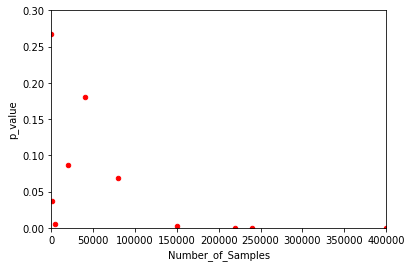

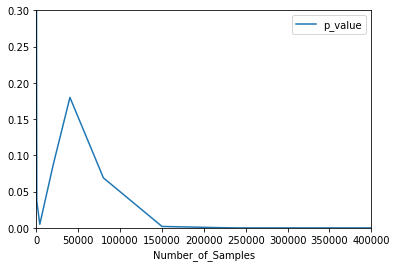

In [10]:
# Plot p-values vrs Sample size:

df_pvalues.plot(x ='Number_of_Samples', y='p_value', color='red',kind = 'scatter', xlim=[0,400000],ylim=[0, 0.3])
df_pvalues.plot(x ='Number_of_Samples', y='p_value', kind = 'line', xlim=[0,400000],ylim=[0, 0.3]);

In [166]:
df_pvalues.transpose()

,0,1,2,3,4,5,6,7,8,9,10
Number_of_Samples,50.000,100.000,400.000,4000.000,20000.000,40000.00,80000.000,150000.000,220000.0000,240000.000000,4.000000e+05
p_value,0.798,0.267,0.037,0.005,0.087,0.18,0.069,0.002,0.0003,0.000016,3.800000e-07
